# Topic Modeling #

Gensim-based functions:

Load functions from 'topics.py'.

In [1]:
import topics as tp

Tell jupyter to draw figures within the browser.

In [2]:
%matplotlib inline

Read text files from a folder.

In [3]:
folder = './corpus/*.txt'
documents = tp.readCorpus(folder)

Store the file names as document labels in a separate list.

In [4]:
doc_labels = tp.docLabels(folder)
doc_labels

['Kipling_TheEndofthePassage',
 'Howard_TheDevilinIron',
 'Poe_TheMasqueoftheRedDeath',
 'Doyle_AScandalinBohemia',
 'Doyle_AStudyinScarlet',
 'Kipling_ThyServantaDog',
 'Poe_TheCaskofAmontillado',
 'Howard_ShadowsintheMoonlight',
 'Howard_GodsoftheNorth',
 'Howard_SchadowsinZamboula',
 'Doyle_TheSignoftheFour',
 'Lovecraft_AttheMountainofMadness',
 'Poe_ThePurloinedLetter',
 'Lovecraft_TheShunnedHouse',
 'Poe_EurekaAProsePoem',
 'Kipling_TheJungleBook',
 'Doyle_TheHoundoftheBaskervilles']

### Preprocessing ###

Tokenize texts.

In [5]:
texts = tp.tokenize(documents)

Remove hapax legomena.

In [6]:
texts = tp.removeHapaxLeg(texts)

Remove stopwords.

In [7]:
texts = tp.removeStopWords(texts, stoplist = 'en')

### Model creation ###

In [8]:
from gensim import corpora, models
# Specify number of topics
no_of_topics = 10
# Generate dictionary object
dictionary = corpora.Dictionary(texts)
# Generate corpus object
corpus = [dictionary.doc2bow(text) for text in texts]
# Generate model object
model = models.LdaModel(corpus,
    id2word = dictionary,
    num_topics = no_of_topics,
    passes = 10
    )

Create labels for topics from gensim model.

In [9]:
topic_labels = tp.topicLabels(model, no_of_topics)

Show topics with build-in gensim function.

In [10]:
model.show_topics(num_topics = 5)

['0.001*said + 0.001*s + 0.001*man + 0.000*did + 0.000*like + 0.000*great + 0.000*time + 0.000*saw + 0.000*little + 0.000*came',
 '0.022*said + 0.011*s + 0.010*sir + 0.007*man + 0.006*did + 0.005*ravager + 0.005*like + 0.005*came + 0.005*holmes + 0.005*dog',
 '0.018*said + 0.016*s + 0.009*little + 0.009*mowgli + 0.007*man + 0.006*jungle + 0.006*head + 0.005*bagheera + 0.005*like + 0.005*come',
 '0.008*s + 0.004*lake + 0.004*great + 0.004*old + 0.003*like + 0.003*did + 0.003*certain + 0.003*feet + 0.003*ones + 0.003*camp',
 '0.015*conan + 0.012*s + 0.007*like + 0.005*man + 0.005*eyes + 0.005*door + 0.004*black + 0.004*did + 0.004*sword + 0.004*girl']

Save gensim output.

In [11]:
tp.saveGensimModel(model, corpus, dictionary, no_of_topics, doc_labels)

saving ...



### The document-topic matrix ###
Create a doc-topic matrix from the gensim objects.

In [12]:
doc_topic = tp.gensim_to_dtm(model, corpus, no_of_topics)

### Document-topic heatmap ###

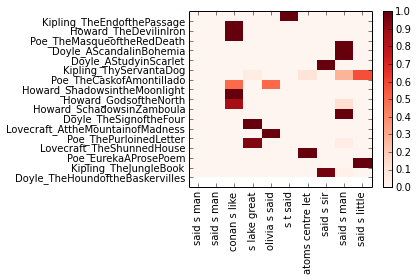

In [13]:
tp.docTopHeatmap(doc_topic, doc_labels, topic_labels)